In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler
from statsmodels.stats import weightstats as stests
sns.set(style="whitegrid", palette="pastel", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('../Data/spotify_cleaned.csv')

In [35]:
df_original = pd.read_csv('../Data/spotify.csv')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
df_original.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,danceability,duration_ms,energy,loudness,mode,target,tempo,valence
0,0.706,225947,0.537,-6.347,1,1,203.746,0.775
1,0.652,249960,0.621,-8.677,0,1,169.983,0.661
2,0.609,228707,0.445,-9.129,1,1,118.393,0.166
3,0.593,273053,0.680,-5.556,1,1,84.547,0.483
4,0.783,229800,0.758,-2.663,0,1,89.434,0.780


In [38]:
df_original.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.00887,https://api.spotify.com/v1/audio-analysis/6iaj...,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,0.000000,7,0.1290,-6.347,1,0.348,1,203.746,4,https://api.spotify.com/v1/tracks/6iajHa34cSiD...,audio_features,spotify:track:6iajHa34cSiD5s42Cq9miJ,0.775
1,0.10400,https://api.spotify.com/v1/audio-analysis/4oiA...,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,0.000005,9,0.0382,-8.677,0,0.263,1,169.983,4,https://api.spotify.com/v1/tracks/4oiAlcisfimX...,audio_features,spotify:track:4oiAlcisfimXQc1wyAtX9a,0.661
2,0.60300,https://api.spotify.com/v1/audio-analysis/3XVB...,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,0.000007,7,0.1040,-9.129,1,0.106,1,118.393,3,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,audio_features,spotify:track:3XVBdLihbNbxUwZosxcGuJ,0.166
3,0.00182,https://api.spotify.com/v1/audio-analysis/0GLU...,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,0.000048,7,0.3100,-5.556,1,0.335,1,84.547,4,https://api.spotify.com/v1/tracks/0GLUBbX4daHJ...,audio_features,spotify:track:0GLUBbX4daHJkT3RQHEOia,0.483
4,0.38400,https://api.spotify.com/v1/audio-analysis/1yeL...,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,0.000000,10,0.0938,-2.663,0,0.151,1,89.434,4,https://api.spotify.com/v1/tracks/1yeLSqz8u8ip...,audio_features,spotify:track:1yeLSqz8u8ip9NnzjGs7lQ,0.780


In [39]:
df_original.drop(['analysis_url','id','track_href','type','uri'],axis=1,inplace=True)

In [9]:
df.columns

Index(['danceability', 'duration_ms', 'energy', 'loudness', 'mode', 'target',
       'tempo', 'valence'],
      dtype='object')

In [40]:
df_original.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'target', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [10]:
#define features and target
X = df[['danceability', 'duration_ms', 'energy', 'loudness', 'mode', 'tempo', 'valence']]
y = df['target']

#Split the data into x and y test and train sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree Classifier - Cleaned Data

In [15]:
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(X_train, y_train)
y_pred = c.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  29.7 %


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.32      0.36      0.34       160
          1       0.27      0.23      0.25       163

avg / total       0.29      0.30      0.29       323



### ROC Evaluation

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

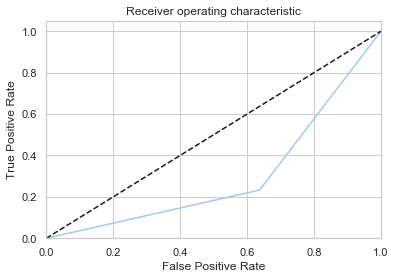

In [27]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

#print(roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[0], tpr[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## Confusion Matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 58 102]
 [125  38]]


In [30]:
df_cm = pd.DataFrame(cm, index=['0','1'],
                  columns=['0','1'])

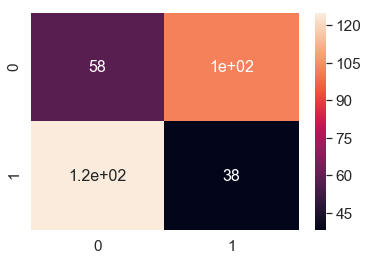

In [31]:
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

### Normalized Confusion Matrix

In [32]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [33]:
df_cm = pd.DataFrame(cm, index=['0','1'],
                  columns=['0','1'])

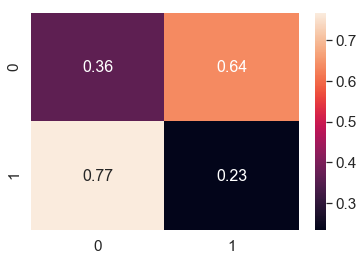

In [34]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

## Parameter Tuning - CV Grid Search

In [42]:
dt = DecisionTreeClassifier()

In [44]:
# Setup the hyperparameter grid
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = [0.001, 0.1, 1, 10, 100]
criterion = ['gini','entropy']
param_grid = {'criterion': criterion,'max_depth': max_depths,'min_samples_split': min_samples_splits, 
              'min_samples_leaf': min_samples_leaf}

#combine parameters with model
clf_model = GridSearchCV(dt,param_grid,scoring='f1_micro',cv=5)

# Fit it to the data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': [0.001, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [45]:
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(clf_model.best_params_))

Tuned Logistic Regression Parameters: {'criterion': 'gini', 'max_depth': 1.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [47]:
y_pred = clf_model.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

print(classification_report(y_test, y_pred))

Accuracy using Decision Tree:  45.2 %
             precision    recall  f1-score   support

          0       0.41      0.25      0.31       160
          1       0.47      0.65      0.54       163

avg / total       0.44      0.45      0.43       323



# Logistic Regression - Cleaned Data

### Statsmodel

In [49]:
lr = sm.Logit(y_train, X_train)

In [50]:
result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.689908
         Iterations 4


In [51]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1291
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                0.003171
Time:                        20:00:10   Log-Likelihood:                -890.67
converged:                       True   LL-Null:                       -893.50
                                        LLR p-value:                    0.4615
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
danceability     0.5241      0.389      1.347      0.178      -0.238       1.286
duration_ms   4.289e-07    1.2e-06      0.357      0.721   -1.93e-06    2.79e-06
energy          -0.1287      0.365     -0.35

### SK-Learn

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.46      0.14      0.22       160
          1       0.50      0.83      0.62       163

avg / total       0.48      0.49      0.42       323



## Normalized Confusion Matrix

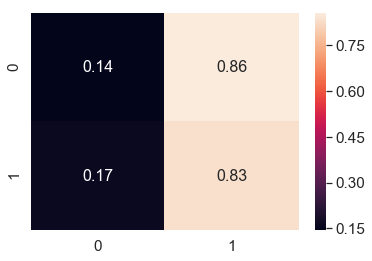

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=['0','1'],
                  columns=['0','1'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

## Parameter Tuning - CV Grid Search


In [57]:
lr = LogisticRegression()

In [58]:
# Setup the hyperparameter grid
c = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2']
param_grid = {'C': c,'penalty': penalty}

#combine parameters with model
lr_model = GridSearchCV(lr,param_grid,cv=5)

# Fit it to the data
lr_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print('Best Penalty:', lr_model.best_estimator_.get_params()['penalty'])
print('Best C:', lr_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.001


In [62]:
y_pred = lr_model.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy using Logistic Regression: ", round(score, 1), "%")

print(classification_report(y_test, y_pred))

Accuracy using Logistic Regression:  49.2 %
             precision    recall  f1-score   support

          0       0.46      0.14      0.22       160
          1       0.50      0.83      0.62       163

avg / total       0.48      0.49      0.42       323



# KNeighbors - Cleaned Data

In [75]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  21.1 %


## Normalized Confusion Matrix

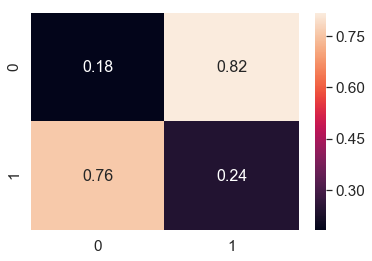

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=['0','1'],
                  columns=['0','1'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

## Parameter Tuning - CV Grid Search

In [68]:
knn = KNeighborsClassifier(3)

In [70]:
# Setup the hyperparameter grid
n_neighbors = [3, 5, 10]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': n_neighbors,'weights': weights, 'algorithm': algorithm}

#combine parameters with model
knn_model = GridSearchCV(knn,param_grid,cv=5)

# Fit it to the data
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(knn_model.best_params_))

Tuned Logistic Regression Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}


In [77]:
y_pred = knn_model.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy using KNeighbors Classifier: ", round(score, 1), "%")

print(classification_report(y_test, y_pred))

Accuracy using KNeighbors Classifier:  31.0 %
             precision    recall  f1-score   support

          0       0.34      0.42      0.38       160
          1       0.26      0.20      0.23       163

avg / total       0.30      0.31      0.30       323

